<a href="https://colab.research.google.com/github/anahitaoladan/Artificial-Intelligence/blob/main/AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

سوال اول-جداسازی نقاط داخل مثلث

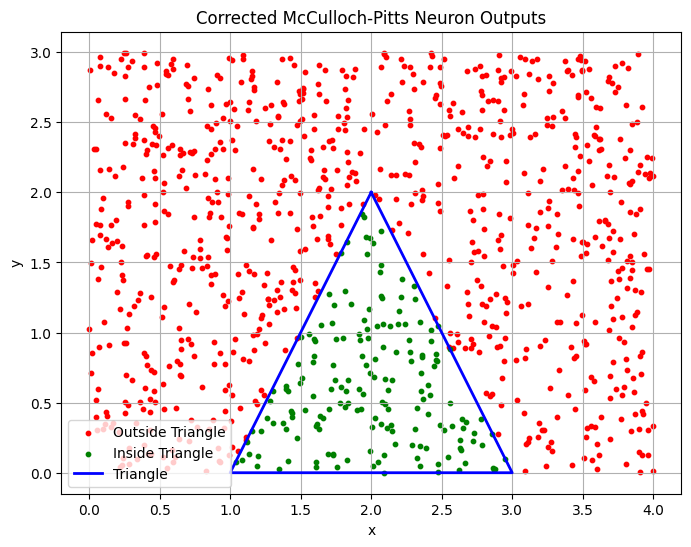

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def neuron1(x, y):
    return 1 if 2*x + y - 6 < 0 else 0

def neuron2(x, y):
    return 1 if y > 0 else 0

def neuron3(x, y):
    return 1 if -2*x + y + 2 < 0 else 0

def triangle_detector(x, y):
    return 1 if neuron1(x, y) and neuron2(x, y) and neuron3(x, y) else 0

np.random.seed(0)
num_points = 1000
x_vals = np.random.uniform(0, 4, num_points)
y_vals = np.random.uniform(0, 3, num_points)

outputs = np.array([triangle_detector(x, y) for x, y in zip(x_vals, y_vals)])

plt.figure(figsize=(8, 6))
plt.scatter(x_vals[outputs == 0], y_vals[outputs == 0], color='red', s=10, label='Outside Triangle')
plt.scatter(x_vals[outputs == 1], y_vals[outputs == 1], color='green', s=10, label='Inside Triangle')

triangle_x = [2, 3, 1, 2]
triangle_y = [2, 0, 0, 2]
plt.plot(triangle_x, triangle_y, color='blue', linewidth=2, label='Triangle')

plt.title('Corrected McCulloch-Pitts Neuron Outputs')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

کد دوم پرسش اول

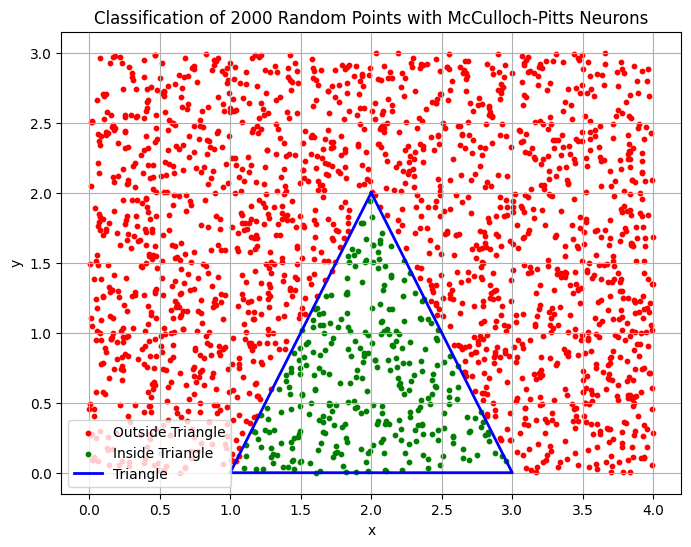

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def neuron1(x, y):
    return 1 if 2*x + y - 6 < 0 else 0

def neuron2(x, y):
    return 1 if y > 0 else 0

def neuron3(x, y):
    return 1 if -2*x + y + 2 < 0 else 0

def triangle_detector(x, y):
    return 1 if neuron1(x, y) and neuron2(x, y) and neuron3(x, y) else 0

np.random.seed(0)
num_points = 2000
x_vals = np.random.uniform(0, 4, num_points)
y_vals = np.random.uniform(0, 3, num_points)

outputs = np.array([triangle_detector(x, y) for x, y in zip(x_vals, y_vals)])

plt.figure(figsize=(8, 6))

plt.scatter(x_vals[outputs == 0], y_vals[outputs == 0], color='red', s=10, label='Outside Triangle')

plt.scatter(x_vals[outputs == 1], y_vals[outputs == 1], color='green', s=10, label='Inside Triangle')

triangle_x = [2, 3, 1, 2]
triangle_y = [2, 0, 0, 2]
plt.plot(triangle_x, triangle_y, color='blue', linewidth=2, label='Triangle')

plt.title('Classification of 2000 Random Points with McCulloch-Pitts Neurons')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

سوال اول پرسش سوم تابع اول

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def render_persian_char(char, image_size=(28, 28)):

    image = Image.new('L', image_size, color=255)
    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype(font_path, size=20)
    except IOError:
        raise IOError(f"فونت در مسیر '{font_path}' یافت نشد.")

    text_width, text_height = draw.textsize(char, font=font)
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)

    draw.text(position, char, fill=0, font=font)

    image_array = np.array(image)

    binary_image = (image_array < threshold).astype(np.uint8)

    return binary_image

سوال اول پرسش سوم تابع دوم

In [ ]:
import numpy as np

def add_binary_noise(image):

    if seed is not None:
        np.random.seed(seed)

    noisy_image = image.copy()

    total_pixels = noisy_image.size
    num_noisy = int(noise_level * total_pixels)

    indices = np.random.choice(total_pixels, size=num_noisy, replace=False)

    flat_image = noisy_image.flatten()

    flat_image[indices] = 1 - flat_image[indices]

    return flat_image.reshape(noisy_image.shape)

سوال دوم پرسش دوم

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving B-NAZANIN.TTF to B-NAZANIN (2).TTF


فونت پیدا نشد! استفاده از فونت پیش‌فرض.


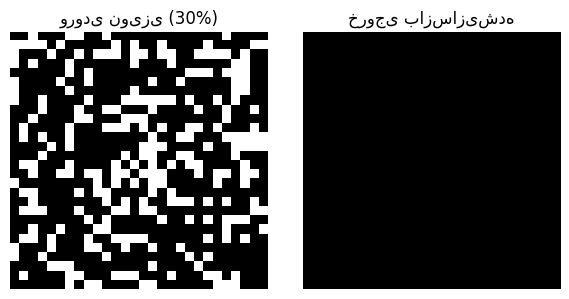

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def render_persian_char(char, font_path='BNazanin.ttf', image_size=(28, 28), threshold=128):
    image = Image.new('L', image_size, color=255)
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.truetype(font_path, size=20)
    except:
        print("فونت پیدا نشد! استفاده از فونت پیش‌فرض.")
        font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), char, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)
    draw.text(position, char, fill=0, font=font)
    image_array = np.array(image)
    return (image_array < threshold).astype(np.uint8)

def bin_to_bipolar(img): return img * 2 - 1
def bipolar_to_bin(img): return ((img + 1) // 2).astype(np.uint8)

def train_hopfield(patterns):
    W = np.zeros((patterns.shape[1], patterns.shape[1]))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W

def run_hopfield(W, input_pattern, max_iter=100):
    x = input_pattern.copy()
    for _ in range(max_iter):
        x_new = np.sign(W @ x)
        x_new[x_new == 0] = 1
        if np.array_equal(x, x_new):
            break
        x = x_new
    return x

def add_binary_noise(image, noise_level=0.3, seed=42):
    if seed is not None:
        np.random.seed(seed)
    flat = image.flatten()
    total = len(flat)
    num_noisy = int(noise_level * total)
    indices = np.random.choice(total, num_noisy, replace=False)
    flat[indices] = 1 - flat[indices]
    return flat.reshape(image.shape)

char = 'آ'
font_path = 'BNazanin.ttf'
image = render_persian_char(char, font_path)
pattern = bin_to_bipolar(image.flatten())

W = train_hopfield(np.array([pattern]))

noisy_image = add_binary_noise(image, noise_level=0.3)
noisy_pattern = bin_to_bipolar(noisy_image.flatten())

recovered = run_hopfield(W, noisy_pattern)
recovered_image = bipolar_to_bin(recovered).reshape(28, 28)

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("ورودی نویزی (30%)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recovered_image, cmap='gray')
plt.title("خروجی بازسازی‌شده")
plt.axis('off')

plt.tight_layout()
plt.show()

سوال سوم پرسش سوم تابع با مقدار گمشده

In [ ]:
import numpy as np

def generate_missing_point_image(image, missing_ratio, seed=None):

    if seed is not None:
        np.random.seed(seed)

    output = image.copy()

    active_pixels = np.argwhere(output == 1)

    num_missing = int(missing_ratio * len(active_pixels))

    if num_missing == 0:
        return output

    selected = active_pixels[np.random.choice(len(active_pixels), num_missing, replace=False)]

    for i, j in selected:
        output[i, j] = 0

    return output

سوال سوم پرسش سوم تابع با مقدار گمشده ی مشخص

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving B-NAZANIN.TTF to B-NAZANIN (3).TTF


فونت پیدا نشد. استفاده از پیش‌فرض.


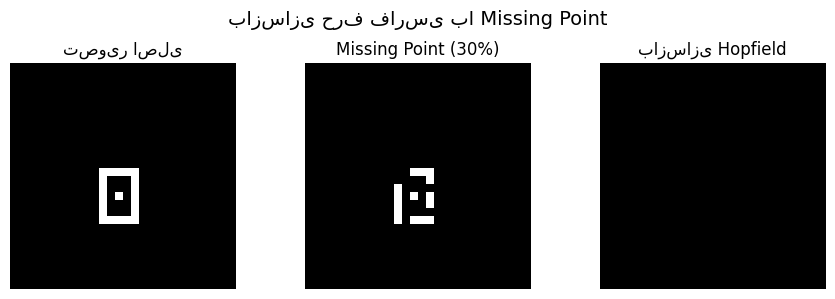

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def bin_to_bipolar(img): return img * 2 - 1
def bipolar_to_bin(img): return ((img + 1) // 2).astype(np.uint8)

def render_persian_char(char, font_path='BNazanin.ttf', image_size=(28, 28), threshold=128):
    image = Image.new('L', image_size, color=255)
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.truetype(font_path, size=20)
    except:
        print("فونت پیدا نشد. استفاده از پیش‌فرض.")
        font = ImageFont.load_default()
    bbox = draw.textbbox((0, 0), char, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    position = ((28 - text_width)//2, (28 - text_height)//2)
    draw.text(position, char, fill=0, font=font)
    img_array = np.array(image)
    return (img_array < threshold).astype(np.uint8)

def add_missing_points(image, missing_ratio=0.3, seed=42):
    if seed is not None:
        np.random.seed(seed)
    output = image.copy()
    active_pixels = np.argwhere(output == 1)
    num_missing = int(missing_ratio * len(active_pixels))
    selected = active_pixels[np.random.choice(len(active_pixels), num_missing, replace=False)]
    for i, j in selected:
        output[i, j] = 0
    return output

def train_hopfield(patterns):
    W = np.zeros((patterns.shape[1], patterns.shape[1]))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W

def run_hopfield(W, input_pattern, max_iter=100):
    x = input_pattern.copy()
    for _ in range(max_iter):
        x_new = np.sign(W @ x)
        x_new[x_new == 0] = 1
        if np.array_equal(x, x_new):
            break
        x = x_new
    return x

char = 'آ'
font_path = 'BNazanin.ttf'
image = render_persian_char(char, font_path)
original_pattern = bin_to_bipolar(image.flatten())

W = train_hopfield(np.array([original_pattern]))

missing_image = add_missing_points(image, missing_ratio=0.3)
missing_pattern = bin_to_bipolar(missing_image.flatten())

recovered = run_hopfield(W, missing_pattern)
recovered_image = bipolar_to_bin(recovered).reshape(28, 28)

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("تصویر اصلی")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(missing_image, cmap='gray')
plt.title("Missing Point (30%)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(recovered_image, cmap='gray')
plt.title("بازسازی Hopfield")
plt.axis('off')

plt.suptitle("بازسازی حرف فارسی با Missing Point", fontsize=14)
plt.tight_layout()
plt.show()